# Prep DATA SET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

In [2]:
#adding path to data and defining categories
DATADIR = "C:/Users/soumy/Desktop/ML/Data"
CATEGORIES = ["Male" , "Female"]

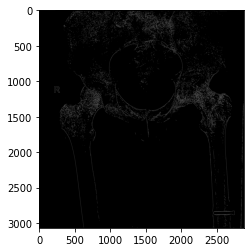

In [3]:
#loading data into array
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  # iterate over each image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        v = np.median(img_array)
        sigma=0.1
        #---- Apply automatic Canny edge detection using the computed median----
        lower = int(max(0, (1.0 - sigma) * v))
        upper = int(min(255, (1.0 + sigma) * v))
        edge_array = cv2.Canny(img_array, threshold1=lower, threshold2=upper)
        plt.imshow(edge_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  
    break  

In [4]:
print(img_array.shape)

(3068, 2884)


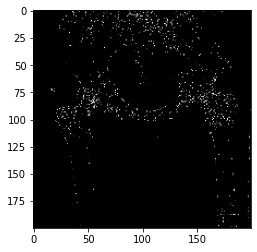

In [5]:
#resizing every image
IMG_SIZE = 200
new_array = cv2.resize(edge_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = "gray")

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=female 1=male

        for img in os.listdir(path):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                edge_array = cv2.Canny(new_array, threshold1=30, threshold2=100)
                training_data.append([edge_array, class_num])  # add this to our training_data
            except Exception as e:   #ignores few errors
                pass


create_training_data()

print(len(training_data))

237


In [7]:
#shuffle data

random.shuffle(training_data)

In [8]:
for sample in training_data[:2]:
    print(sample)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]
[array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0]], dtype=uint8), 0]


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
#convert list to np array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [10]:
#save the arrays
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [31]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir= os.path.join('logs','Xray_canny2',''))

In [32]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [33]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 2D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=20, epochs=50, validation_split=0.2, callbacks=[tensorboard])

Train on 189 samples, validate on 48 samples
Epoch 1/50
189/189 [==============================] - 3s 18ms/sample - loss: 3.0307 - accuracy: 0.4074 - val_loss: 0.6921 - val_accuracy: 0.7083
Epoch 2/50
189/189 [==============================] - 3s 14ms/sample - loss: 0.6585 - accuracy: 0.6561 - val_loss: 0.5928 - val_accuracy: 0.7292
Epoch 3/50
189/189 [==============================] - 3s 14ms/sample - loss: 0.6348 - accuracy: 0.6402 - val_loss: 0.6001 - val_accuracy: 0.7292
Epoch 4/50
189/189 [==============================] - 3s 14ms/sample - loss: 0.6199 - accuracy: 0.6402 - val_loss: 0.6056 - val_accuracy: 0.7292
Epoch 5/50
189/189 [==============================] - 3s 14ms/sample - loss: 0.6042 - accuracy: 0.6402 - val_loss: 0.5906 - val_accuracy: 0.7292
Epoch 6/50
189/189 [==============================] - 3s 14ms/sample - loss: 0.5641 - accuracy: 0.6402 - val_loss: 0.5992 - val_accuracy: 0.7292
Epoch 7/50
189/189 [==============================] - 3s 14ms/sample - loss: 0.5216 -